In [62]:
# %pip install pandas
# %pip install folium
%pip install geopy

     |████████████████████████████████| 113 kB 5.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
from IPython.display import IFrame

In [21]:
IFrame(src = 'https://www.covid19india.org/', width = 1000, height = 600)

In [50]:
import pandas as pd
#read in data
corona_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-03-2020.csv')
#aggregate by country
by_country = corona_df.groupby('Country_Region').sum()[['Confirmed', 'Deaths', 'Recovered', 'Active']]
#select 15 largest countries by confirmed cases
cdf = by_country.nlargest(15, 'Confirmed')[['Confirmed']]
corona_df

FIPS     Admin2  Province_State      Country_Region  \
0     45001.0  Abbeville  South Carolina                  US   
1     22001.0     Acadia       Louisiana                  US   
2     51001.0   Accomack        Virginia                  US   
3     16001.0        Ada           Idaho                  US   
4     19001.0      Adair            Iowa                  US   
...       ...        ...             ...                 ...   
3639      NaN        NaN             NaN  West Bank and Gaza   
3640      NaN        NaN             NaN      Western Sahara   
3641      NaN        NaN             NaN               Yemen   
3642      NaN        NaN             NaN              Zambia   
3643      NaN        NaN             NaN            Zimbabwe   

              Last_Update        Lat       Long_  Confirmed  Deaths  \
0     2020-06-04 02:33:14  34.223334  -82.461707         46       0   
1     2020-06-04 02:33:14  30.295065  -92.414197        446      26   
2     2020-06-04 02:33:14  37.767072  -75.632346        953      12   
3     2020-06-04 02:33:14  43.452658 -116.241552        818      22   
4     2020-06-04 02:33:14  41.330756  -94.471059          9       0   
...                   ...        ...         ...        ...     ...   
3639  2020-06-04 02:33:14  31.952200   35.233200        457       3   
3640  2020-06-04 02:33:14  24.215500  -12.885800          9       1   
3641  2020-06-04 02:33:14  15.552727   48.516388        419      95   
3642  2020-06-04 02:33:14 -13.133897   27.849332       1089       7   
3643  2020-06-04 02:33:14 -19.015438   29.154857        222       4   

      Recovered  Active                   Combined_Key  Incidence_Rate  \
0             0      46  Abbeville, South Carolina, US      187.548416   
1             0     420          Acadia, Louisiana, US      718.833105   
2             0     941         Accomack, Virginia, US     2949.003590   
3             0     796                 Ada, Idaho, US      169.855083   
4             0       9                Adair, Iowa, US      125.838926   
...         ...     ...                            ...             ...   
3639        372      82             West Bank and Gaza        8.958297   
3640          6       2                 Western Sahara        1.506705   
3641         17     307                          Yemen        1.404816   
3642        912     170                         Zambia        5.923643   
3643         29     189                       Zimbabwe        1.493649   

      Case-Fatality_Ratio  
0                0.000000  
1                5.829596  
2                1.259182  
3                2.689487  
4                0.000000  
...                   ...  
3639             0.656455  
3640            11.111111  
3641            22.673031  
3642             0.642792  
3643             1.801802  

[3644 rows x 14 columns]

In [46]:
def find_top_confirmed(n = 15):
  '''
  This function accepts a number n as an input
  and will return the top n countries based 
  on number of confirmed cases.
  '''
  import pandas as pd
  corona_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-03-2020.csv')
  by_country = corona_df.groupby('Country_Region').sum()[['Confirmed', 'Deaths', 'Recovered', 'Active']]
  cdf = by_country.nlargest(n, 'Confirmed')[['Confirmed']]
  return cdf

In [47]:
results = find_top_confirmed()

In [1]:
import pandas as pd
corona_df = pd.read_csv('https://api.covid19india.org/csv/latest/district_wise.csv')
corona_df.head()
import folium
#!pip install folium
m = folium.Map(location = [20.593684,78.96288],
           tiles = 'Stamen toner',
           zoom_start = 8)
folium.Circle(location = [20.593684,78.96288], radius = 10000, color = 'red', fill = True,
              popup = 'confirmed {}'.format(20)).add_to(m)
def circle_maker(x):
  folium.Circle(location = [x[0], x[1]],
                radius = float(x[2])*10,
                popup = '{}\nConfirmed Cases: {}'.format(x[3], x[2])).add_to(m)
corona_df[['Lat', 'Long_', 'Confirmed', 'Combined_Key']].dropna(subset = ['Lat', 'Long_']).apply(lambda x: circle_maker(x), axis = 1)

KeyError: "['Combined_Key', 'Lat', 'Long_'] not in index"

In [49]:
m

In [2]:
import pandas as pd
#read in data
#read in data
corona_df = pd.read_csv('https://api.covid19india.org/csv/latest/district_wise.csv')
corona_df

SlNo State_Code                        State  \
0       0         UN             State Unassigned   
1       1         AN  Andaman and Nicobar Islands   
2       2         AN  Andaman and Nicobar Islands   
3       3         AN  Andaman and Nicobar Islands   
4       0         AP               Andhra Pradesh   
..    ...        ...                          ...   
788   760         TG                    Telangana   
789   761         TR                      Tripura   
790   762         UP                Uttar Pradesh   
791   763         UT                  Uttarakhand   
792   764         WB                  West Bengal   

                    District_Key                  District  Confirmed  Active  \
0                  UN_Unassigned                Unassigned       8250    8250   
1                    AN_Nicobars                  Nicobars          0       0   
2    AN_North and Middle Andaman  North and Middle Andaman          1       0   
3               AN_South Andaman             South Andaman         32       0   
4            AP_Foreign Evacuees          Foreign Evacuees        131     127   
..                           ...                       ...        ...     ...   
788                   TG_Unknown                   Unknown        357    -895   
789                   TR_Unknown                   Unknown          0       0   
790                   UP_Unknown                   Unknown          0       0   
791                   UT_Unknown                   Unknown          0       0   
792                   WB_Unknown                   Unknown          0       0   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
0            0         0             0.0              418           418   
1            0         0             0.0                0             0   
2            1         0             0.0                0             0   
3           32         0             0.0                0             0   
4            4         0             0.0                0             0   
..         ...       ...             ...              ...           ...   
788       1159        93             NaN                0             0   
789          0         0             NaN                0             0   
790          0         0             NaN                0             0   
791          0         0             NaN                0             0   
792          0         0             NaN                0             0   

     Delta_Recovered  Delta_Deceased  District_Notes  Last_Updated  
0                  0               0             NaN           NaN  
1                  0               0             NaN           NaN  
2                  0               0             NaN           NaN  
3                  0               0             NaN           NaN  
4                  0               0             NaN           NaN  
..               ...             ...             ...           ...  
788                0               0             NaN           NaN  
789                0               0             NaN           NaN  
790                0               0             NaN           NaN  
791                0               0             NaN           NaN  
792                0               0             NaN           NaN  

[793 rows x 16 columns]

In [ ]:
corona_df[corona_df['State'] == 'Maharashtra']

In [1]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
import numpy as np

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


In [5]:
def geolocate(city=None, country='India'):
    '''
    Inputs city and country, or just country. Returns the lat/long coordinates of 
    either the city if possible, if not, then returns lat/long of the center of the country.
    '''
    
    # If the city exists,
    if city != None:
        # Try
        try:
            # To geolocate the city and country
            loc = geolocator.geocode(str(city + ',' + country))
            # And return latitude and longitude
            return (loc.latitude, loc.longitude)
        # Otherwise
        except:
            # Return missing value
            return np.nan
    # If the city doesn't exist
    else:
        # Try
        try:
            # Geolocate the center of the country
            loc = geolocator.geocode(country)
            # And return latitude and longitude 
            return (loc.latitude, loc.longitude)
        # Otherwise
        except:
            # Return missing value
            return np.nan

In [58]:
geolocate(city='Dhalai')

(23.8253158, 91.9732226716333)

In [81]:
corona_df['District'][1]

'Nicobars'

In [7]:
district_lalong = []
for index, row in corona_df.iterrows():
    lat_long = geolocate(city=row['District'])
    district_lalong.append(lat_long)
#     print("District:",row['District'])
#     print(lat_long)

In [28]:
dfObj = pd.DataFrame(district_lalong,columns=["Latlong"]) 
dfObj.to_csv('latlong.csv', sep='\t')

In [29]:
col_Names=["Latlong"] 
my_CSV_File= pd.read_csv('latlong.csv',names=col_Names)

In [30]:
read_lalon = pd.read_csv('latlong.csv', sep='\t')
read_lalon.drop(columns='Unnamed: 0',inplace=True)

In [31]:
read_lalon

Latlong
0                                 NaN
1                                 NaN
2    (12.61123865, 92.83165406414926)
3     (10.7056905, 92.48746789633373)
4                                 NaN
..                                ...
788           (13.0526602, 80.252387)
789           (13.0526602, 80.252387)
790           (13.0526602, 80.252387)
791           (13.0526602, 80.252387)
792           (13.0526602, 80.252387)

[793 rows x 1 columns]

In [33]:
read_lalon['Latlong'] =  read_lalon['Latlong'].astype(str).apply(lambda x: x.replace('(','').replace(')','')) 

In [34]:
read_lalon.head()

Latlong
0                             nan
1                             nan
2  12.61123865, 92.83165406414926
3   10.7056905, 92.48746789633373
4                             nan

In [36]:
read_lalon[['Lat','Long']] = read_lalon.Latlong.str.split(",",expand=True,)
read_lalon.drop(columns='Latlong',inplace=True)

In [39]:
read_lalon

Lat                Long
0            nan                None
1            nan                None
2    12.61123865   92.83165406414926
3     10.7056905   92.48746789633373
4            nan                None
..           ...                 ...
788   13.0526602           80.252387
789   13.0526602           80.252387
790   13.0526602           80.252387
791   13.0526602           80.252387
792   13.0526602           80.252387

[793 rows x 2 columns]

In [40]:
horizontal_stack = pd.concat([corona_df, read_lalon], axis=1)

In [57]:
horizontal_stack[horizontal_stack['District'] == 'Hassan']

SlNo State_Code      State District_Key District  Confirmed  Active  \
291   284         KA  Karnataka    KA_Hassan   Hassan        197     140   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
291         57         0             0.0                0             0   

     Delta_Recovered  Delta_Deceased  District_Notes  Last_Updated  \
291                0               0             NaN           NaN   

            Lat         Long  
291  13.0070817   76.0992703

In [49]:
horizontal_stack.to_csv('Districtwise_India.csv',sep='\t')

In [72]:
import pandas as pd
corona_df = pd.read_csv('Districtwise_India.csv',sep='\t')
corona_df.head()
import folium
# #!pip install folium
m = folium.Map(location = [20.593684,78.96288],
           tiles = 'Stamen toner',
           zoom_start = 8)
folium.Circle(location = [20.593684,78.96288], radius = 1000, color = 'blue', fill = True,
              popup = 'confirmed {}'.format(20)).add_to(m)
def circle_maker(x):
    folium.Circle(location = [x[0], x[1]],
                radius = float(x[2])*10,
                popup = '{}\nConfirmed Cases: {}'.format(x[3], x[2])).add_to(m)
corona_df[['Lat', 'Long', 'Confirmed', 'District']].dropna(subset = ['Lat', 'Long']).apply(lambda x: circle_maker(x), axis = 1)

2      None
3      None
5      None
6      None
7      None
       ... 
788    None
789    None
790    None
791    None
792    None
Length: 772, dtype: object

In [45]:
m

In [1]:
import pandas as pd
#read in data
#read in data
corona_June = pd.read_csv('raw_data6.csv')
corona_June.shape

(3760, 20)

In [2]:
# check_for_nan = corona_df['Detected City'].isnull()
corona_district = corona_June[corona_June['Detected District'].notnull()]

In [3]:
corona_district[(corona_district['Current Status'] == 'Recovered') & (corona_district['Detected District'] == 'Bhopal')]

Entry_ID State Patient Number Date Announced  Age Bracket Gender  \
1456   50086.0                  NaN     05/06/2020          NaN    NaN   
2981   51611.0                  NaN     06/06/2020          NaN    NaN   

     Detected City Detected District  Detected State State code  Num Cases  \
1456           NaN            Bhopal  Madhya Pradesh         MP       46.0   
2981           NaN            Bhopal  Madhya Pradesh         MP       40.0   

     Current Status  Contracted from which Patient (Suspected) Notes  \
1456      Recovered                                        NaN   NaN   
2981      Recovered                                        NaN   NaN   

                                               Source_1 Source_2  Source_3  \
1456                       https://t.me/indiacovid/6422      NaN       NaN   
2981  https://twitter.com/healthminmp/status/1269293...      NaN       NaN   

      Nationality  Type of transmission  Status Change Date  Patient Number  
1456          NaN                   NaN                 NaN         79456.0  
2981          NaN                   NaN                 NaN         80982.0

In [8]:
district_latlong = []
for index, row in corona_district.iterrows():
    lat_long = geolocate(city=row['Detected District'])
    district_latlong.append(lat_long)

In [9]:
district_latlong

[(22.898553, 92.75192291719874),
 (23.7414092, 92.7209297),
 (20.22564715, 85.56059465125232),
 nan,
 (18.7232023, 82.60811827787269),
 (20.22564715, 85.56059465125232),
 (19.8076083, 85.8252538),
 (18.965998550000002, 84.19287455014992),
 (20.8522696, 86.3385714),
 (20.2593872, 86.1660878),
 (19.19557415, 84.19297736346317),
 (21.75, 86.5),
 (20.4686, 85.8792),
 (20.8382426, 85.0973949),
 (21.3474637, 83.65427922282043),
 (20.75, 85.5),
 (20.75, 83.25),
 (21.0633288, 86.5053731),
 (21.5892323, 85.66878413736906),
 (20.13069385, 84.07904760590154),
 (19.75, 83.0),
 (19.5, 84.5),
 (22.25, 84.5),
 (19.08143, 84.5144503),
 (20.50040085, 86.43170622796478),
 (23.3700354, 85.3250132),
 (23.699127949999998, 85.99106894165021),
 (23.9675151, 85.43884568595615),
 (22.6664325, 84.5502679119221),
 (24.4931239, 85.55608107203881),
 (24.15529035, 83.82522584408349),
 (23.916667, 84.083333),
 (22.5, 85.5),
 (23.74186545, 84.51301366522105),
 (23.0916741, 84.5738480719802),
 (22.7464225, 85.91689291

In [14]:
dfObj = pd.DataFrame(district_latlong,columns=['latitude','longitude']) 
dfObj.to_csv('latlong_june.csv', sep='\t')

In [17]:
data = pd.read_csv('latlong_june.csv',sep='\t')
data.drop(columns='Unnamed: 0',inplace=True)

In [18]:
data

latitude  longitude
0     22.898553  92.751923
1     23.741409  92.720930
2     20.225647  85.560595
3           NaN        NaN
4     18.723202  82.608118
...         ...        ...
3320  23.741409  92.720930
3321  30.719402  76.764655
3322  30.719402  76.764655
3323  30.925896  77.082005
3324  30.719402  76.764655

[3325 rows x 2 columns]

In [10]:
stack_covid = pd.concat([corona_district, data], axis=1)

NameError: name 'corona_district' is not defined

In [25]:
stack_covid.drop(columns=['Notes','Source_1','Source_2','Source_3','Nationality','Type of transmission','Status Change Date','Contracted from which Patient (Suspected)','Age Bracket'],inplace=True)


In [26]:
stack_covid

Entry_ID State Patient Number Date Announced Gender Detected City  \
0      48613.0                  NaN     05/06/2020    NaN           NaN   
1      48614.0                  NaN     05/06/2020    NaN       Falkawn   
2          NaN                  NaN            NaN    NaN           NaN   
3      48616.0                  NaN     05/06/2020    NaN           NaN   
4      48617.0                  NaN     05/06/2020    NaN           NaN   
...        ...                  ...            ...    ...           ...   
3365   51995.0                  NaN     07/06/2020      F           NaN   
3366   51997.0                  NaN     07/06/2020      M           NaN   
3367   51998.0                  NaN     07/06/2020      M           NaN   
3368   51999.0                  NaN     07/06/2020    NaN           NaN   
3759   51996.0                  NaN     07/06/2020    NaN           NaN   

     Detected District    Detected State State code  Num Cases Current Status  \
0              Lunglei           Mizoram         MZ        1.0   Hospitalized   
1               Aizawl           Mizoram         MZ        4.0   Hospitalized   
2                  NaN               NaN        NaN        NaN            NaN   
3              Khordha            Odisha         OR        1.0       Deceased   
4           Unassigned  State Unassigned         UN      127.0   Hospitalized   
...                ...               ...        ...        ...            ...   
3365            Aizawl           Mizoram         MZ        1.0   Hospitalized   
3366        Chandigarh        Chandigarh         CH        1.0   Hospitalized   
3367        Chandigarh        Chandigarh         CH        1.0   Hospitalized   
3368             Solan  Himachal Pradesh         HP        1.0      Recovered   
3759        Chandigarh        Chandigarh         CH        1.0   Hospitalized   

      Patient Number   latitude  longitude  
0            78000.0  22.898553  92.751923  
1            78001.0  23.741409  92.720930  
2                NaN  20.225647  85.560595  
3            78003.0        NaN        NaN  
4            78004.0  18.723202  82.608118  
...              ...        ...        ...  
3365             NaN        NaN        NaN  
3366             NaN        NaN        NaN  
3367             NaN        NaN        NaN  
3368             NaN        NaN        NaN  
3759             NaN        NaN        NaN  

[3370 rows x 13 columns]

In [2]:
import pandas as pd
import folium
# m = folium.Map(location = [20.593684,78.96288],
#            tiles = 'Stamen toner',
#            zoom_start = 8)
# folium.Circle(location = [20.593684,78.96288], radius = 10000, color = 'red', fill = True,
#               popup = 'confirmed {}'.format(20)).add_to(m)
# def circle_maker(x):
#     folium.Circle(location = [x[0], x[1]],
#                 radius = float(x[2])*10,
#                 popup = '{}\nConfirmed Cases: {}'.format(x[3], x[2])).add_to(m)
# stack_covid[['latitude', 'longitude', 'Num Cases', 'Detected District']].dropna(subset = ['latitude', 'longitude']).apply(lambda x: circle_maker(x), axis = 1)

In [34]:
m

In [17]:
India_map = '/Users/meghamodi/Downloads/india_states.geojson'
India_map

'/Users/meghamodi/Downloads/india_states.geojson'

In [16]:
import geopandas as gpd
df_fr = gpd.read_file('/Users/meghamodi/Downloads/IND_adm/IND_adm2.shp')
df_fr.groupby(['NAME_1']).sum()

ID_0  ID_1   ID_2
NAME_1                                   
Andaman and Nicobar      210     2      3
Andhra Pradesh          1365    26    117
Arunachal Pradesh       1575    45    345
Assam                   2415    92    966
Bihar                   3885   185   2664
Chandigarh               105     6     91
Chhattisgarh            1680   112   1592
Dadra and Nagar Haveli   105     8    108
Daman and Diu            210    18    219
Delhi                    105    10    111
Goa                      210    22    225
Gujarat                 2625   300   3150
Haryana                 1995   247   2812
Himachal Pradesh        1260   168   1962
Jammu and Kashmir       1470   210   2471
Jharkhand               2310   352   4279
Karnataka               2835   459   5913
Kerala                  1470   252   3353
Lakshadweep              105    19    247
Madhya Pradesh          5040   960  13032
Maharashtra             3570   714  10625
Manipur                  945   198   3006
Meghalaya                735   161   2394
Mizoram                  840   192   2796
Nagaland                 840   200   2860
Orissa                  3150   780  11295
Puducherry               420   108   1574
Punjab                  1785   476   6868
Rajasthan               3360   928  13712
Sikkim                   420   120   1786
Tamil Nadu              3150   930  13905
Telangana               1050   320   4835
Tripura                  420   132   1962
Uttar Pradesh           7350  2380  36925
Uttaranchal             1365   455   7397
West Bengal             1995   684  11115

In [25]:
import pandas as pd
df_state = pd.read_csv('/Users/meghamodi/Downloads/datasets_7536_10717_district wise population and centroids.csv')
# df_state.head()
g = df_state.groupby(['State']).sum()
g.to_csv("statewise.csv",sep='\t')

In [6]:
india_map = folium.Map(location = [20.593684,78.96288],
           tiles =  'Stamen Toner',
           zoom_start = 4)
india_map

In [ ]:
folium.GeoJson(df_fr).add_to(india_map)
india_map

In [ ]:
folium.Choropleth(
    geo_data = df_fr,
    name = 'choropleth',
    data = d,
    columns = ['State', 'Population in 2011'],
    key_on = 'feature.properties.NAME_1',
    fill_color = 'YlOrRd',
    fill_opacity = 0.9,
    line_opacity = 0.5,
    legend_name = 'Population'
).add_to(india_map)

folium.LayerControl().add_to(india_map)

india_map

In [9]:
d = pd.read_csv("statewise.csv",sep='\t')

In [11]:
d

State     Latitude    Longitude  Population in 2001  \
0      Andhra Pradesh   160.868489   807.560865            36120039   
1   Arunachal Pradesh   389.493391  1320.928285             1072160   
2               Assam   500.379546  1761.862373            19963729   
3               Bihar   871.269280  2918.384850            74151567   
4          Chandigarh    30.742600    76.758725              900635   
5        Chhattisgarh   261.675198   989.365324            17487000   
6                 Goa    30.744002   147.748473             1347668   
7             Gujarat   465.596338  1511.967019            38551653   
8             Haryana   496.749195  1299.695019            17204888   
9    Himachal Pradesh   347.475115   847.032903             6044676   
10          Jharkhand   407.235092  1458.561946            19685963   
11          Karnataka   322.688349  1676.241207            37819964   
12             Kerala   136.062470   990.458714            30607358   
13     Madhya Pradesh  1066.543806  3520.418739            55257045   
14        Maharashtra   524.947253  2053.302545            72086875   
15            Manipur   172.745981   657.254841             1454638   
16          Meghalaya   152.707385   546.718504             2126032   
17            Mizoram   186.380067   742.510802              888573   
18           Nagaland   208.662841   755.215496             1671098   
19             Punjab   462.541286  1132.734111            20781063   
20          Rajasthan   706.425955  2019.892289            48334711   
21         Tamil Nadu   230.745581  1650.176835            40009534   
22            Tripura    94.895141   367.144657             3199203   
23      Uttar Pradesh  1640.156736  4913.823944           145265807   
24        West Bengal   220.612774   794.029425            31889002   

    Population in 2011  
0             39250184  
1              1354556  
2             23415900  
3             92737812  
4              1055450  
5             21507910  
6              1458545  
7             45865519  
8             20555285  
9              6833038  
10            24194739  
11            42276165  
12            32208649  
13            66444576  
14            85187845  
15             1881689  
16             2708049  
17             1097206  
18             1758795  
19            23519350  
20            58994792  
21            45183196  
22             3673917  
23           174746712  
24            36412280

## Netherlands

In [261]:
import geopandas as gpd
from datetime import datetime             # for manipulating dates
import matplotlib.pyplot as plt           # for plotting
%matplotlib inline
import mapclassify
import scipy
import descartes
import sklearn
# %pip install -U scikit-learn
# %pip install -U --no-deps mapclassify
# %pip install scipy

In [23]:
data_nth = gpd.read_file("/Users/meghamodi/Downloads/COVID-19_-_Actuele_gegevens_RIVM__vlakken_.geojson")
data_nth

Gemeentenaam Gemeentecode  Gemeentenummer      Provincie  \
0       's-Gravenhage       GM0518             518   Zuid-Holland   
1    's-Hertogenbosch       GM0796             796  Noord-Brabant   
2         Aa en Hunze       GM1680            1680        Drenthe   
3            Aalsmeer       GM0358             358  Noord-Holland   
4              Aalten       GM0197             197     Gelderland   
..                ...          ...             ...            ...   
350           Zundert       GM0879             879  Noord-Brabant   
351           Zutphen       GM0301             301     Gelderland   
352   Zwartewaterland       GM1896            1896     Overijssel   
353       Zwijndrecht       GM0642             642   Zuid-Holland   
354            Zwolle       GM0193             193     Overijssel   

    Provinciecode  Provincienummer           Veiligheidsregio  \
0            PV28               28                 Haaglanden   
1            PV30               30              Brabant-Noord   
2            PV22               22                    Drenthe   
3            PV27               27       Amsterdam-Amstelland   
4            PV25               25  Noord- en Oost-Gelderland   
..            ...              ...                        ...   
350          PV30               30    Midden- en West-Brabant   
351          PV25               25  Noord- en Oost-Gelderland   
352          PV23               23                 IJsselland   
353          PV28               28          Zuid-Holland-Zuid   
354          PV23               23                 IJsselland   

    Veiligheidsregiocode  Veiligheidsregionummer  \
0                   VR15                      15   
1                   VR21                      21   
2                   VR03                       3   
3                   VR13                      13   
4                   VR06                       6   
..                   ...                     ...   
350                 VR20                      20   
351                 VR06                       6   
352                 VR04                       4   
353                 VR18                      18   
354                 VR04                       4   

                                       GGD_regio  ...                Datum  \
0                                 GGD Haaglanden  ...  2020-06-09T00:00:00   
1                          GGD Hart voor Brabant  ...  2020-06-09T00:00:00   
2                                     GGD Drente  ...  2020-06-09T00:00:00   
3                                  GGD Amsterdam  ...  2020-06-09T00:00:00   
4                  GGD Noord- en Oost-Gelderland  ...  2020-06-09T00:00:00   
..                                           ...  ...                  ...   
350                             GGD West-Brabant  ...  2020-06-09T00:00:00   
351                GGD Noord- en Oost-Gelderland  ...  2020-06-09T00:00:00   
352                               GGD Ijsselland  ...  2020-06-09T00:00:00   
353  Dienst Gezondheid & Jeugd Zuid-Holland Zuid  ...  2020-06-09T00:00:00   
354                               GGD Ijsselland  ...  2020-06-09T00:00:00   

     Meldingen  Ziekenhuisopnamen  Overleden Bevolkingsaantal  \
0         1588                330        232           545163   
1          492                126         77           155113   
2           14                  1          0            25453   
3           39                  9          3            31857   
4           58                  9          7            27117   
..         ...                ...        ...              ...   
350         94                 23         10            21821   
351         99                 31         13            47942   
352        144                 35         19            22690   
353        159                 23         27            44741   
354        355                 53         46           128831   

     Meldingen_100000  Ziekenhuisopnamen_100000  Overled

In [24]:
data_nth.rename(
    columns = {'Gemeentenaam':'Municipality', 
               'Gemeentecode':'MunicipalityCode',
               'Gemeentenummer':'MunicipalityNumber', 
               'Provincie':'Province', 
               'Provinciecode':'ProvinceCode',
               'Provincienummer':'ProvinceNumber',
               'Veiligheidsregio':'SecurityRegion',
               'Veiligheidsregiocode':'SecurityRegionCode',
               'Veiligheidsregionummer':'SecuretyRegionCode',
               'GGD_regio':'GGD_Region',
               'GGD_regiocode':'GGD_RegionCode',
               'GGD_regionummer':'GGD_RegionNumber',
               'Datum':'Date', 
               'Meldingen':'Reported',
               'Ziekenhuisopnamen':'Hospitalized',
               'Overleden':'Deaths',
               'Bevolkingsaantal':'Population',
               'Meldingen_100000':'Reported_100000', 
               'Ziekenhuisopnamen_100000':'Hospitalized_100000',
               'Overleden_100000':'Deaths_100000'},
    inplace = True)

In [25]:
data_nth

Municipality MunicipalityCode  MunicipalityNumber       Province  \
0       's-Gravenhage           GM0518                 518   Zuid-Holland   
1    's-Hertogenbosch           GM0796                 796  Noord-Brabant   
2         Aa en Hunze           GM1680                1680        Drenthe   
3            Aalsmeer           GM0358                 358  Noord-Holland   
4              Aalten           GM0197                 197     Gelderland   
..                ...              ...                 ...            ...   
350           Zundert           GM0879                 879  Noord-Brabant   
351           Zutphen           GM0301                 301     Gelderland   
352   Zwartewaterland           GM1896                1896     Overijssel   
353       Zwijndrecht           GM0642                 642   Zuid-Holland   
354            Zwolle           GM0193                 193     Overijssel   

    ProvinceCode  ProvinceNumber             SecurityRegion  \
0           PV28              28                 Haaglanden   
1           PV30              30              Brabant-Noord   
2           PV22              22                    Drenthe   
3           PV27              27       Amsterdam-Amstelland   
4           PV25              25  Noord- en Oost-Gelderland   
..           ...             ...                        ...   
350         PV30              30    Midden- en West-Brabant   
351         PV25              25  Noord- en Oost-Gelderland   
352         PV23              23                 IJsselland   
353         PV28              28          Zuid-Holland-Zuid   
354         PV23              23                 IJsselland   

    SecurityRegionCode  SecuretyRegionCode  \
0                 VR15                  15   
1                 VR21                  21   
2                 VR03                   3   
3                 VR13                  13   
4                 VR06                   6   
..                 ...                 ...   
350               VR20                  20   
351               VR06                   6   
352               VR04                   4   
353               VR18                  18   
354               VR04                   4   

                                      GGD_Region  ...                 Date  \
0                                 GGD Haaglanden  ...  2020-06-09T00:00:00   
1                          GGD Hart voor Brabant  ...  2020-06-09T00:00:00   
2                                     GGD Drente  ...  2020-06-09T00:00:00   
3                                  GGD Amsterdam  ...  2020-06-09T00:00:00   
4                  GGD Noord- en Oost-Gelderland  ...  2020-06-09T00:00:00   
..                                           ...  ...                  ...   
350                             GGD West-Brabant  ...  2020-06-09T00:00:00   
351                GGD Noord- en Oost-Gelderland  ...  2020-06-09T00:00:00   
352                               GGD Ijsselland  ...  2020-06-09T00:00:00   
353  Dienst Gezondheid & Jeugd Zuid-Holland Zuid  ...  2020-06-09T00:00:00   
354                               GGD Ijsselland  ...  2020-06-09T00:00:00   

     Reported  Hospitalized  Deaths Population  Reported_100000  \
0        1588           330     232     545163            291.3   
1         492           126      77     155113            317.2   
2          14             1       0      25453             55.0   
3          39             9       3      31857            122.4   
4          58             9       7      27117            213.9   
..        ...           ...     ...        ...              ...   
350        94            23      10      21821            430.8   
351        99            31      13      47942            206.5   
352       144            35      19      22690            634.6   
353       159            23      27      44741            355.4   
354       355            53      46     128831            275.6   

     Hospitalized_100000  Deaths

In [7]:
data_nth.sort_values(by ='Reported_100000', ascending=False)[[
        'Municipality', 'Province', 'Reported_100000']].head()

Municipality       Province  Reported_100000
127       Heerde     Gelderland           1027.6
163      Landerd  Noord-Brabant            915.4
37      Bernheze  Noord-Brabant            876.9
45        Boekel  Noord-Brabant            825.3
214     Nunspeet     Gelderland            797.3

In [8]:
data_nth.sort_values(by ='Reported_100000', ascending=True)[[
        'Municipality', 'Province', 'Reported_100000']].head()

Municipality   Province  Reported_100000
14           Ameland  Friesland              0.0
259  Schiermonnikoog  Friesland              0.0
308         Vlieland  Friesland              0.0
181        Loppersum  Groningen             21.0
328      Westerwolde  Groningen             23.3

In [9]:
data_nth['Density']=data_nth['Population']/data_nth['Shape__Area']*1e6


In [231]:
def custom_div_cmap(numcolors=5, name='custom_div_cmap',
                    col1='yellowgreen',col2='gold',col3='orange',col4='red', col5='darkred'):
        """ Create a custom diverging colormap with seven colors """

        from matplotlib.colors import LinearSegmentedColormap 

        cmap = LinearSegmentedColormap.from_list(name=name, 
                                        colors =[col1, col2, col3, col4, col5],
                                            N=numcolors)
        return cmap

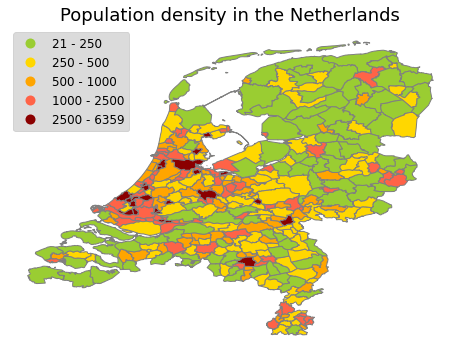

In [14]:
fig, ax = plt.subplots(1, 1)                  # initializing a figure
fig.set_size_inches(8,8)                      # setting the size

cmap=custom_div_cmap(5, col1='yellowgreen',col2='gold',col3='orange',col4='tomato', col5='darkred')  

bins=[250, 500, 1000, 2500]                  # selecting classification bins
data_nth.plot(column='Density', ax=ax, edgecolor='gray',
               cmap=cmap, legend=True, scheme='User_Defined', classification_kwds={'bins':bins}, 
               legend_kwds={'loc': 2, 'fontsize': 12, 'frameon':True})

# handling the legend appearance and labels
leg=ax.get_legend()
handles = leg.legendHandles
frame = leg.get_frame()
frame.set_facecolor('lightgray')
labels = ax.get_legend().get_texts()

for lbl in labels:                      # small loop to display legend labels as integers
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]   
    new_text = '%.0f - %.0f' % (float(lower), float(upper))
    lbl.set_text(new_text)

ax.axis('off')
ax.set_title('Population density in the Netherlands', fontsize=18)
fig.savefig('Population_NL.png', dpi=300)
plt.show()

In [12]:
%pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [220]:
import geopandas as gpd
data_ind = gpd.read_file("/Users/meghamodi/Downloads/india_district.geojson")
data_ind[data_ind['NAME_1'] == 'Madhya Pradesh']

ID_0  ISO NAME_0  ID_1          NAME_1   ID_2       NAME_2  \
64    105  IND  India  1306  Madhya Pradesh  16013    Tikamgarh   
65    105  IND  India  1306  Madhya Pradesh  16014       Ujjain   
66    105  IND  India  1306  Madhya Pradesh  16015       Umaria   
67    105  IND  India  1306  Madhya Pradesh  16016      Vidisha   
68    105  IND  India  1306  Madhya Pradesh  16017   West Nimar   
92    105  IND  India  1306  Madhya Pradesh  15972     Balaghat   
93    105  IND  India  1306  Madhya Pradesh  15973      Barwani   
94    105  IND  India  1306  Madhya Pradesh  15974        Betul   
95    105  IND  India  1306  Madhya Pradesh  15975        Bhind   
96    105  IND  India  1306  Madhya Pradesh  15976       Bhopal   
97    105  IND  India  1306  Madhya Pradesh  15977    Burhanpur   
98    105  IND  India  1306  Madhya Pradesh  15978   Chhatarpur   
99    105  IND  India  1306  Madhya Pradesh  15979   Chhindwara   
100   105  IND  India  1306  Madhya Pradesh  15980        Damoh   
310   105  IND  India  1306  Madhya Pradesh  15970      Anuppur   
311   105  IND  India  1306  Madhya Pradesh  15971   Ashoknagar   
312   105  IND  India  1306  Madhya Pradesh  15981        Datia   
313   105  IND  India  1306  Madhya Pradesh  15982        Dewas   
314   105  IND  India  1306  Madhya Pradesh  15983         Dhar   
315   105  IND  India  1306  Madhya Pradesh  15984      Dindori   
316   105  IND  India  1306  Madhya Pradesh  15985   East Nimar   
317   105  IND  India  1306  Madhya Pradesh  15986         Guna   
318   105  IND  India  1306  Madhya Pradesh  15987      Gwalior   
319   105  IND  India  1306  Madhya Pradesh  15988        Harda   
320   105  IND  India  1306  Madhya Pradesh  15989  Hoshangabad   
321   105  IND  India  1306  Madhya Pradesh  15990       Indore   
322   105  IND  India  1306  Madhya Pradesh  15991     Jabalpur   
323   105  IND  India  1306  Madhya Pradesh  15992       Jhabua   
324   105  IND  India  1306  Madhya Pradesh  15993        Katni   
325   105  IND  India  1306  Madhya Pradesh  15994       Mandla   
326   105  IND  India  1306  Madhya Pradesh  15995     Mandsaur   
327   105  IND  India  1306  Madhya Pradesh  15996       Morena   
328   105  IND  India  1306  Madhya Pradesh  15997  Narsinghpur   
329   105  IND  India  1306  Madhya Pradesh  15998      Neemuch   
330   105  IND  India  1306  Madhya Pradesh  15999        Panna   
331   105  IND  India  1306  Madhya Pradesh  16000       Raisen   
332   105  IND  India  1306  Madhya Pradesh  16001      Rajgarh   
333   105  IND  India  1306  Madhya Pradesh  16002       Ratlam   
334   105  IND  India  1306  Madhya Pradesh  16003         Rewa   
335   105  IND  India  1306  Madhya Pradesh  16004        Sagar   
336   105  IND  India  1306  Madhya Pradesh  16005        Satna   
337   105  IND  India  1306  Madhya Pradesh  16006       Sehore   
338   105  IND  India  1306  Madhya Pradesh  16007        Seoni   
339   105  IND  India  1306  Madhya Pradesh  16008      Shahdol   
340   105  IND  India  1306  Madhya Pradesh  16009     Shajapur   
341   105  IND  India  1306  Madhya Pradesh  16010      Sheopur   
342   105  IND  India  1306  Madhya Pradesh  16011     Shivpuri   
343   105  IND  India  1306  Madhya Pradesh  16012        Sidhi   

               VARNAME_2 NL_NAME_2    HASC_2 CC_2    TYPE_2 ENGTYPE_2  \
64                                  IN.MP.TI       District  District   
65                                  IN.MP.UJ       District  District   
66                                  IN.MP.UM       District  District   
67                                  IN.MP.VI       District  District   
68     Khargone;Khargaon            IN.MP.WN       District  District   
92                                  IN.MP.BL       District  District   
93                                  IN.MP.BR       District  District   
94                                  IN.MP.BE       District  District   
95                                  IN.MP.BD       District  Dis

In [1]:
import requests
import pandas as pd
import lxml

#Set Headers for request to the website 
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

#URL from where the tables will be scraped
url='https://covidindia.org/'

#Fetch the page at the url using "requests" module
r = requests.get(url, headers=header)

#Read all tables in the response into a list of dataframes
dataframes=pd.read_html(r.text, header=0)

#Iterate through the data frames to access each table
for dataframe_state in dataframes:
    print(dataframe_state)

                                State  Confirmed Cases  Recoveries  Deaths
0         Andaman and Nicobar Islands               38          33       0
1                      Andhra Pradesh             5636        3091      80
2                   Arunachal Pradesh               67           4       0
3                               Assam             3498        1584       8
4                               Bihar             6096        3316      36
5                          Chandigarh              334         295       5
6                        Chhattisgarh             1429         526       6
7   Dadar & Nagar Haveli; Daman & Diu               30           2       0
8                               Delhi            34687       12731    1085
9                                 Goa              463          67       0
10                            Gujarat            22537       15501    1416
11                            Haryana             6334        2475      70
12                   Hima

In [2]:
dataframe_state.reset_index(level=0, inplace=True)

In [3]:
dataframe_state

index                              State  Confirmed Cases  Recoveries  \
0       0        Andaman and Nicobar Islands               38          33   
1       1                     Andhra Pradesh             5636        3091   
2       2                  Arunachal Pradesh               67           4   
3       3                              Assam             3498        1584   
4       4                              Bihar             6096        3316   
5       5                         Chandigarh              334         295   
6       6                       Chhattisgarh             1429         526   
7       7  Dadar & Nagar Haveli; Daman & Diu               30           2   
8       8                              Delhi            34687       12731   
9       9                                Goa              463          67   
10     10                            Gujarat            22537       15501   
11     11                            Haryana             6334        2475   
12     12                   Himachal Pradesh              486         293   
13     13                  Jammu and Kashmir             4730        2086   
14     14                          Jharkhand             1643         630   
15     15                          Karnataka             6516        3440   
16     16                             Kerala             2322         999   
17     17                             Ladakh              239          55   
18     18                        Lakshadweep                0           0   
19     19                     Madhya Pradesh            10443        7201   
20     20                        Maharashtra           101141       47796   
21     21                            Manipur              366          73   
22     22                          Meghalaya               44          13   
23     23                            Mizoram              102           1   
24     24                           Nagaland              156          30   
25     25                             Odisha             3498        2474   
26     26                         Puducherry              157          67   
27     27                             Punjab             2986        2282   
28     28                          Rajasthan            12068        9011   
29     29                             Sikkim               27           3   
30     30                         Tamil Nadu            40698       22047   
31     31                          Telangana             4484        2278   
32     32                            Tripura              922         278   
33     33                      Uttar Pradesh            12088        7292   
34     34                        Uttarakhand             1692         895   
35     35                        West Bengal            10244        4206   
36     36                         Unassigned             8315           0   
37     37                              Total           306516      153075   

    Deaths  
0        0  
1       80  
2        0  
3        8  
4       36  
5        5  
6        6  
7        0  
8     1085  
9        0  
10    1416  
11      70  
12       6  
13      53  
14       8  
15      81  
16      19  
17       1  
18       0  
19     440  
20    3717  
21       0  
22       1  
23       0  
24       0  
25      12  
26       2  
27      63  
28     272  
29       0  
30     367  
31     174  
32       1  
33     345  
34      19  
35     451  
36       0  
37    8738

In [56]:
dataframe_state.reset_index

<bound method DataFrame.reset_index of     level_0  index                              State  Confirmed Cases  \
0         0      0        Andaman and Nicobar Islands               35   
1         1      1                     Andhra Pradesh             5247   
2         2      2                  Arunachal Pradesh               57   
3         3      3                              Assam             3092   
4         4      4                              Bihar             5698   
5         5      5                         Chandigarh              328   
6         6      6                       Chhattisgarh             1240   
7         7      7  Dadar & Nagar Haveli; Daman & Diu               26   
8         8      8                              Delhi            32810   
9         9      9                                Goa              387   
10       10     10                            Gujarat            21529   
11       11     11                            Haryana             5579   

In [4]:
data_list = dataframe_state['State'].to_list()
data_list[:36]
for i in range(len(data_list)):
    print( data_list[i])

Andaman and Nicobar Islands
Andhra Pradesh
Arunachal Pradesh
Assam
Bihar
Chandigarh
Chhattisgarh
Dadar & Nagar Haveli; Daman & Diu
Delhi
Goa
Gujarat
Haryana
Himachal Pradesh
Jammu and Kashmir
Jharkhand
Karnataka
Kerala
Ladakh
Lakshadweep
Madhya Pradesh
Maharashtra
Manipur
Meghalaya
Mizoram
Nagaland
Odisha
Puducherry
Punjab
Rajasthan
Sikkim
Tamil Nadu
Telangana
Tripura
Uttar Pradesh
Uttarakhand
West Bengal
Unassigned
Total


In [202]:
import requests
import pandas as pd
import lxml
from slugify import slugify
import html5lib
import bs4
from pandas import DataFrame

#Set Headers for request to the website 
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
#URL from where the tables will be scraped
count = 0
for i in range(len(data_list)):
    data = slugify(data_list[i])
    try:
        url='https://covidindia.org/'+data+'/'
        print(url)


    #Fetch the page at the url using "requests" module
        r = requests.get(url, headers=header)

        #Read all tables in the response into a list of dataframes
        dataframes=pd.read_html(r.text, header=0)

    #     #Iterate through the data frames to access each table
    #     for dataframe in dataframes:
        df = pd.DataFrame(dataframes)
        data_district = df[0][0]
        count += 1
        data_district.to_csv(data+"_district.csv", sep='\t')
        
    except Exception as inst:
        print("err")
        continue
        #data_district.to_csv(data+"_district.csv", sep='\t')
    



https://covidindia.org/andaman-and-nicobar-islands/
https://covidindia.org/andhra-pradesh/
https://covidindia.org/arunachal-pradesh/
https://covidindia.org/assam/
https://covidindia.org/bihar/
https://covidindia.org/chandigarh/
err
https://covidindia.org/chhattisgarh/
https://covidindia.org/dadar-nagar-haveli-daman-diu/
err
https://covidindia.org/delhi/
https://covidindia.org/goa/
https://covidindia.org/gujarat/
https://covidindia.org/haryana/
https://covidindia.org/himachal-pradesh/
https://covidindia.org/jammu-and-kashmir/
https://covidindia.org/jharkhand/
https://covidindia.org/karnataka/
https://covidindia.org/kerala/
https://covidindia.org/ladakh/
https://covidindia.org/lakshadweep/
err
https://covidindia.org/madhya-pradesh/
https://covidindia.org/maharashtra/
https://covidindia.org/manipur/
https://covidindia.org/meghalaya/
https://covidindia.org/mizoram/
https://covidindia.org/nagaland/
https://covidindia.org/odisha/
https://covidindia.org/puducherry/
err
https://covidindia.org/

In [206]:
d = pd.read_csv("districts/merge_districts.csv",sep="\t")
d.drop(columns="Unnamed: 0",inplace=True)

In [216]:
r = d[ (d['District'] != 'District' ) & (d['Total Cases'] != 'Total Cases') ]
districts_final = r[(r['District'] != 'Unknown' ) & (r['District'] != 'Total') ]


In [228]:
districts_final['District']=districts_final['District'].str.lower()
data_ind['NAME_2']=data_ind['NAME_2'].str.lower()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [230]:
df_new = pd.merge(districts_final,data_ind,left_on="District",right_on="NAME_2")
df_new

District Total Cases Recoveries Death Active  ID_0  ISO NAME_0  \
0            anantapur         122         73     4     45   105  IND  India   
1             chittoor         192         82     1    109   105  IND  India   
2        east godavari          57         43     0     14   105  IND  India   
3              krishna         382        263    15    104   105  IND  India   
4              kurnool         615        433    21    161   105  IND  India   
..                 ...         ...        ...   ...    ...   ...  ...    ...   
477        murshidabad         156        106     3     47   105  IND  India   
478              nadia         176         77     3     96   105  IND  India   
479  north 24 parganas        1424        472    65    887   105  IND  India   
480  south 24 parganas         383        134    12    237   105  IND  India   
481     uttar dinajpur         214        198     0     16   105  IND  India   

     ID_1          NAME_1   ID_2             NAME_2             VARNAME_2  \
0    1288  Andhra Pradesh  15716          anantapur  Anantpur, Ananthapur   
1    1288  Andhra Pradesh  15717           chittoor       Chitoor|Chittor   
2    1288  Andhra Pradesh  15719      east godavari                         
3    1288  Andhra Pradesh  15724            krishna                Kistna   
4    1288  Andhra Pradesh  15725            kurnool                         
..    ...             ...    ...                ...                   ...   
477  1321     West Bengal  16300        murshidabad                         
478  1321     West Bengal  16301              nadia                         
479  1321     West Bengal  16302  north 24 parganas                         
480  1321     West Bengal  16304  south 24 parganas                         
481  1321     West Bengal  16305     uttar dinajpur                         

    NL_NAME_2    HASC_2 CC_2    TYPE_2 ENGTYPE_2 VALIDFR_2 VALIDTO_2  \
0              IN.AP.AN       District  District   Unknown   Present   
1              IN.AP.CH       District  District   Unknown   Unknown   
2              IN.AP.EG       District  District   Unknown   Present   
3              IN.AP.KR       District  District   Unknown   Present   
4              IN.AP.KU       District  District   Unknown   Present   
..        ...       ...  ...       ...       ...       ...       ...   
477            IN.WB.MU       District  District   Unknown   Present   
478            IN.WB.NA       District  District   Unknown   Present   
479            IN.WB.PN       District  District   Unknown   Unknown   
480            IN.WB.PS       District  District   Unknown   Unknown   
481            IN.WB.UD       District  District   Unknown   Present   

    REMARKS_2  Shape_Leng  Shape_Area  \
0               11.941742    1.611876   
1               10.154080    1.266210   
2                8.411192    0.913507   
3                7.944094    0.729452   
4                7.773343    1.497627   
..        ...         ...         ...   
477              5.073025    0.478267   
478              5.442162    0.345079   
479             25.820801    0.509797   
480             16.565424    0.483769   
481              5.483986    0.302708   

                                              geometry  
0    POLYGON ((78.13678 14.93803, 78.13632 14.93281...  
1    POLYGON ((79.43324 13.87771, 79.43959 13.88052...  
2    MULTIPOLYGON (((82.31735 16.57653, 82.31735 16...  
3    MULTIPOLYGON (((81.02792 15.76569, 81.02792 15...  
4    POLYGON ((78.91335 16.10884, 78.92554 16.06283...  
..                                                 ...  
477  MULTIPOLYGON (((88.67597 24.31550, 88.67482 24...  
478  POLYGON ((88.74962 23.23678, 88.74987 23.23529...  
479  MULTIPOLYGON (((88.83472 21.60722, 88.83500 21...  
480  MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...  
481  MULTIPOLYGON (((88.45979 25.59529, 88.45572 25...  

[482 rows x 24 columns]

In [ ]:
data_nth['Density']=data_nth['Population']/data_nth['Shape__Area']*1e6

In [75]:
from slugify import slugify
for i in range(len(data_list)):
    data = slugify(data_list[i])
    url='https://covidindia.org/'+data+'/'
    print(url)


https://covidindia.org/andaman-and-nicobar-islands/
https://covidindia.org/andhra-pradesh/
https://covidindia.org/arunachal-pradesh/
https://covidindia.org/assam/
https://covidindia.org/bihar/
https://covidindia.org/chandigarh/
https://covidindia.org/chhattisgarh/
https://covidindia.org/dadar-nagar-haveli-daman-diu/
https://covidindia.org/delhi/
https://covidindia.org/goa/
https://covidindia.org/gujarat/
https://covidindia.org/haryana/
https://covidindia.org/himachal-pradesh/
https://covidindia.org/jammu-and-kashmir/
https://covidindia.org/jharkhand/
https://covidindia.org/karnataka/
https://covidindia.org/kerala/
https://covidindia.org/ladakh/
https://covidindia.org/lakshadweep/
https://covidindia.org/madhya-pradesh/
https://covidindia.org/maharashtra/
https://covidindia.org/manipur/
https://covidindia.org/meghalaya/
https://covidindia.org/mizoram/
https://covidindia.org/nagaland/
https://covidindia.org/odisha/
https://covidindia.org/puducherry/
https://covidindia.org/punjab/
https://

In [9]:
dataframe.reset_index(level=0, inplace=True)

In [10]:
dataframe

index                District         Zone
0       0                   Balod   Green Zone
1       1            Baloda Bazar   Green Zone
2       2               Balrampur   Green Zone
3       3                  Bastar   Green Zone
4       4                Bemetara   Green Zone
5       5                 Bijapur   Green Zone
6       6                Bilaspur   Green Zone
7       7               Dantewada   Green Zone
8       8                Dhamtari   Green Zone
9       9            Durg - Rural   Green Zone
10     10               Gariaband   Green Zone
11     11  Gaurela-Pendra-Marwahi   Green Zone
12     12        Janjgir - Champa   Green Zone
13     13                 Jashpur   Green Zone
14     14               Kabirdham   Green Zone
15     15                  Kanker   Green Zone
16     16               Kondagaon   Green Zone
17     17                   Korba  Orange Zone
18     18                  Koriya   Green Zone
19     19              Mahasamund   Green Zone
20     20                 Mungeli   Green Zone
21     21              Narayanpur   Green Zone
22     22                 Raigarh   Green Zone
23     23            Raipur Rural     Red Zone
24     24             Rajnandgaon   Green Zone
25     25                   Sukma   Green Zone
26     26                Surajpur   Green Zone
27     27                 Surguja   Green Zone

In [72]:
%pip install python-slugify

     |████████████████████████████████| 78 kB 3.6 MB/s eta 0:00:011
  Created wheel for python-slugify: filename=python_slugify-4.0.0-py2.py3-none-any.whl size=5486 sha256=79c3d94d1b83fceb62cf97ca28a0e096434de06a8cf8496dd2da9a44ef591c55
  Stored in directory: /Users/meghamodi/Library/Caches/pip/wheels/7c/26/30/5f3d95da00fe94d0c4a5ec5b4ffd2e1ae18545f5fa61752e52
Successfully built python-slugify
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install html5lib
%pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 115 kB 3.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [143]:
import requests
import pandas as pd
import lxml

#Set Headers for request to the website 
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

#URL from where the tables will be scraped
url='https://covidindia.org/chandigarh/'

#Fetch the page at the url using "requests" module
r = requests.get(url, headers=header)

#Read all tables in the response into a list of dataframes
dataframes=pd.read_html(r.text, header=0)

#Iterate through the data frames to access each table
print(dataframes)
# for dataframe in dataframes:
#     print(dataframe)

[     District      Zone
0  Chandigarh  Red Zone]


In [92]:
from pandas import DataFrame
df = DataFrame(dataframes).transpose()
df[0][0]

District  Total Cases  Recoveries  Death  Active
0         Bagalakote           99          83      1      15
1            Ballari           71          43      1      27
2    Bengaluru Rural           37          11      1      25
3    Bengaluru Urban          581         299     23     259
4           Belagavi          302         155      1     146
5              Bidar          298         181      6     111
6      Chamarajnagar            1           0      0       1
7    Chikkaballapura          152         124      3      25
8     Chikkamagaluru           19          18      0       1
9        Chitradurga           40          23      0      17
10  Dakshina Kannada          216          96      6     114
11        Davanagere          223         168      6      49
12          Dharwada           72          46      1      25
13             Gadag           49          35      2      12
14        Kalaburagi          796         285      8     503
15           Hassana          216         160      0      56
16            Haveri           22          14      0       8
17            Kodagu            3           1      0       2
18            Kolara           36          26      0      10
19           Koppala           13           4      0       9
20            Mandya          334         255      0      79
21            Mysuru          104          94      0      10
22          Raichuru          374          82      2     290
23        Ramanagara           12           1      0      11
24        Shivamogga           83          31      0      52
25          Tumakuru           34          28      2       4
26             Udupi          969         349      1     619
27    Uttara Kannada           99          82      0      17
28        Vijayapura          221         147      6      68
29          Yadagiri          735         108      1     626
30            Others           34          27      1       6
31             Total         6245        2976     72    3197

In [100]:
s = pd.Series(dataframes)
print(s)

0                           District  Total Cases  ...
1                           District         Zone
0...
2         District Name                            ...
dtype: object


In [71]:
import numpy as np

In [73]:
dataframe.shape

(3, 4)

In [238]:
dist_pop = pd.read_csv("/Users/meghamodi/Downloads/datasets_14903_19895_india-districts-census-2011.csv")
dist_pop.columns

Index(['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC',
       ...
       'Power_Parity_Rs_90000_150000', 'Power_Parity_Rs_45000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_240000_330000',
       'Power_Parity_Rs_150000_330000', 'Power_Parity_Rs_330000_425000',
       'Power_Parity_Rs_425000_545000', 'Power_Parity_Rs_330000_545000',
       'Power_Parity_Above_Rs_545000', 'Total_Power_Parity'],
      dtype='object', length=118)

In [249]:
dist_pop['District name']=dist_pop['District name'].str.lower()

In [250]:
df_merge_pop = pd.merge(df_new,dist_pop,left_on="District",right_on="District name")

In [252]:
df_merge_pop.to_csv("final_merge_districts.csv")

In [256]:
df_districts = pd.read_csv("final_merge_districts.csv")
df_districts.drop(columns=["Unnamed: 0"],inplace=True)

In [258]:
df_districts

District  Total Cases  Recoveries  Death  Active  ID_0  ISO NAME_0  \
0         anantapur          122        73.0    4.0    45.0   105  IND  India   
1          chittoor          192        82.0    1.0   109.0   105  IND  India   
2     east godavari           57        43.0    0.0    14.0   105  IND  India   
3           krishna          382       263.0   15.0   104.0   105  IND  India   
4           kurnool          615       433.0   21.0   161.0   105  IND  India   
..              ...          ...         ...    ...     ...   ...  ...    ...   
467         kolkata         3356      1323.0  283.0  1750.0   105  IND  India   
468          maldah          253       173.0    0.0    80.0   105  IND  India   
469     murshidabad          156       106.0    3.0    47.0   105  IND  India   
470           nadia          176        77.0    3.0    96.0   105  IND  India   
471  uttar dinajpur          214       198.0    0.0    16.0   105  IND  India   

     ID_1          NAME_1   ID_2          NAME_2             VARNAME_2  \
0    1288  Andhra Pradesh  15716       anantapur  Anantpur, Ananthapur   
1    1288  Andhra Pradesh  15717        chittoor       Chitoor|Chittor   
2    1288  Andhra Pradesh  15719   east godavari                   NaN   
3    1288  Andhra Pradesh  15724         krishna                Kistna   
4    1288  Andhra Pradesh  15725         kurnool                   NaN   
..    ...             ...    ...             ...                   ...   
467  1321     West Bengal  16298         kolkata              Calcutta   
468  1321     West Bengal  16299          maldah                   NaN   
469  1321     West Bengal  16300     murshidabad                   NaN   
470  1321     West Bengal  16301           nadia                   NaN   
471  1321     West Bengal  16305  uttar dinajpur                   NaN   

     NL_NAME_2    HASC_2  CC_2    TYPE_2 ENGTYPE_2 VALIDFR_2 VALIDTO_2  \
0          NaN  IN.AP.AN   NaN  District  District   Unknown   Present   
1          NaN  IN.AP.CH   NaN  District  District   Unknown   Unknown   
2          NaN  IN.AP.EG   NaN  District  District   Unknown   Present   
3          NaN  IN.AP.KR   NaN  District  District   Unknown   Present   
4          NaN  IN.AP.KU   NaN  District  District   Unknown   Present   
..         ...       ...   ...       ...       ...       ...       ...   
467        NaN  IN.WB.KO   NaN  District  District   Unknown   Unknown   
468        NaN  IN.WB.MA   NaN  District  District   Unknown   Unknown   
469        NaN  IN.WB.MU   NaN  District  District   Unknown   Present   
470        NaN  IN.WB.NA   NaN  District  District   Unknown   Present   
471        NaN  IN.WB.UD   NaN  District  District   Unknown   Present   

     REMARKS_2  Shape_Leng  Shape_Area  \
0          NaN   11.941742    1.611876   
1          NaN   10.154080    1.266210   
2          NaN    8.411192    0.913507   
3          NaN    7.944094    0.729452   
4          NaN    7.773343    1.497627   
..         ...         ...         ...   
467        NaN    0.473324    0.008043   
468        NaN    4.155624    0.323374   
469        NaN    5.073025    0.478267   
470        NaN    5.442162    0.345079   
471        NaN    5.483986    0.302708   

                                              geometry  District code  \
0    POLYGON ((78.1367800000001 14.93803100000008, ...            553   
1    POLYGON ((79.433243 13.87771100000003, 79.4395...            554   
2    MULTIPOLYGON (((82.31735300000008 16.576531000...            545   
3    MULTIPOLYGON (((81.02791600000012 15.765694, 8...            547   
4    POLYGON ((78.91335400000008 16.10884100000004,...            552   
..                                                 ...            ...   
467  POLYGON ((88.40731000000011 22.55647000000005,...            342   
468  POLYGON ((88.07041100000009 25.48050100000012,...            332   
469  MULTIPOLYGON (((88.675972 24.3155000000001, 88...            333   
470  POLYGON ((88.7496180

In [259]:
df_districts['Density']=df_districts['Population']/df_districts['Shape_Area']*1e6

In [272]:
def custom_div_cmap(numcolors=5, name='custom_div_cmap',
                    col1='yellowgreen',col2='gold',col3='orange',col4='red', col5='darkred'):
        """ Create a custom diverging colormap with seven colors """

        from matplotlib.colors import LinearSegmentedColormap 

        cmap = LinearSegmentedColormap.from_list(name=name, 
                                        colors =[col1, col2, col3, col4, col5],
                                            N=numcolors)
        return cmap

AttributeError: 'Line2D' object has no property 'column'

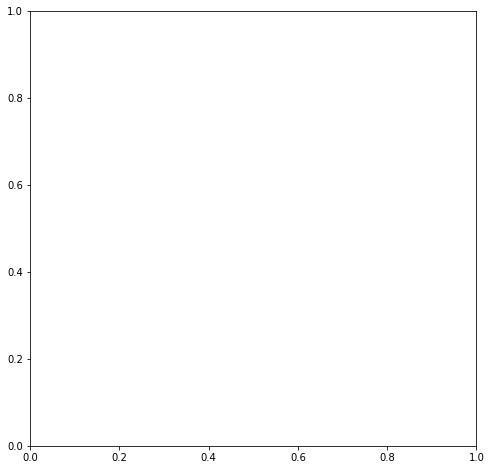

In [281]:
fig, ax = plt.subplots(1, 1)                  # initializing a figure
fig.set_size_inches(8,8)                      # setting the size

cmap=custom_div_cmap(5, col1='yellowgreen',col2='gold',col3='orange',col4='tomato', col5='darkred')  

bins=[250, 500, 1000, 2500]                  # selecting classification bins
df_districts.plot(column='Density', ax=ax, edgecolor='gray',
               cmap=cmap, legend=True, scheme='User_Defined', classification_kwds={'bins':bins}, 
               legend_kwds={'loc': 2, 'fontsize': 12, 'frameon':True})
# handling the legend appearance and labels
leg=ax.get_legend()
handles = leg.legendHandles
frame = leg.get_frame()
frame.set_facecolor('lightgray')
labels = ax.get_legend().get_texts()

for lbl in labels:                      # small loop to display legend labels as integers
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]   
    new_text = '%.0f - %.0f' % (float(lower), float(upper))
    lbl.set_text(new_text)

ax.axis('off')
ax.set_title('Population density in the India', fontsize=18)
fig.savefig('Population_India.png', dpi=300)
plt.show()

In [264]:
df_districts

District  Total Cases  Recoveries  Death  Active  ID_0  ISO NAME_0  \
0         anantapur          122        73.0    4.0    45.0   105  IND  India   
1          chittoor          192        82.0    1.0   109.0   105  IND  India   
2     east godavari           57        43.0    0.0    14.0   105  IND  India   
3           krishna          382       263.0   15.0   104.0   105  IND  India   
4           kurnool          615       433.0   21.0   161.0   105  IND  India   
..              ...          ...         ...    ...     ...   ...  ...    ...   
467         kolkata         3356      1323.0  283.0  1750.0   105  IND  India   
468          maldah          253       173.0    0.0    80.0   105  IND  India   
469     murshidabad          156       106.0    3.0    47.0   105  IND  India   
470           nadia          176        77.0    3.0    96.0   105  IND  India   
471  uttar dinajpur          214       198.0    0.0    16.0   105  IND  India   

     ID_1          NAME_1   ID_2          NAME_2             VARNAME_2  \
0    1288  Andhra Pradesh  15716       anantapur  Anantpur, Ananthapur   
1    1288  Andhra Pradesh  15717        chittoor       Chitoor|Chittor   
2    1288  Andhra Pradesh  15719   east godavari                   NaN   
3    1288  Andhra Pradesh  15724         krishna                Kistna   
4    1288  Andhra Pradesh  15725         kurnool                   NaN   
..    ...             ...    ...             ...                   ...   
467  1321     West Bengal  16298         kolkata              Calcutta   
468  1321     West Bengal  16299          maldah                   NaN   
469  1321     West Bengal  16300     murshidabad                   NaN   
470  1321     West Bengal  16301           nadia                   NaN   
471  1321     West Bengal  16305  uttar dinajpur                   NaN   

     NL_NAME_2    HASC_2  CC_2    TYPE_2 ENGTYPE_2 VALIDFR_2 VALIDTO_2  \
0          NaN  IN.AP.AN   NaN  District  District   Unknown   Present   
1          NaN  IN.AP.CH   NaN  District  District   Unknown   Unknown   
2          NaN  IN.AP.EG   NaN  District  District   Unknown   Present   
3          NaN  IN.AP.KR   NaN  District  District   Unknown   Present   
4          NaN  IN.AP.KU   NaN  District  District   Unknown   Present   
..         ...       ...   ...       ...       ...       ...       ...   
467        NaN  IN.WB.KO   NaN  District  District   Unknown   Unknown   
468        NaN  IN.WB.MA   NaN  District  District   Unknown   Unknown   
469        NaN  IN.WB.MU   NaN  District  District   Unknown   Present   
470        NaN  IN.WB.NA   NaN  District  District   Unknown   Present   
471        NaN  IN.WB.UD   NaN  District  District   Unknown   Present   

     REMARKS_2  Shape_Leng  Shape_Area  \
0          NaN   11.941742    1.611876   
1          NaN   10.154080    1.266210   
2          NaN    8.411192    0.913507   
3          NaN    7.944094    0.729452   
4          NaN    7.773343    1.497627   
..         ...         ...         ...   
467        NaN    0.473324    0.008043   
468        NaN    4.155624    0.323374   
469        NaN    5.073025    0.478267   
470        NaN    5.442162    0.345079   
471        NaN    5.483986    0.302708   

                                              geometry  District code  \
0    POLYGON ((78.1367800000001 14.93803100000008, ...            553   
1    POLYGON ((79.433243 13.87771100000003, 79.4395...            554   
2    MULTIPOLYGON (((82.31735300000008 16.576531000...            545   
3    MULTIPOLYGON (((81.02791600000012 15.765694, 8...            547   
4    POLYGON ((78.91335400000008 16.10884100000004,...            552   
..                                                 ...            ...   
467  POLYGON ((88.40731000000011 22.55647000000005,...            342   
468  POLYGON ((88.07041100000009 25.48050100000012,...            332   
469  MULTIPOLYGON (((88.675972 24.3155000000001, 88...            333   
470  POLYGON ((88.7496180